In [281]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [242]:
df = pd.read_excel ('content.xlsx')
df

,ID,Title,Price,Company,Rating,Specifications,Links,Review ID,Reviews,Scores
0,63,Nokia 105 Nokia 106 Dual Sim Box Pack Non Warr...,2999,Nokia,4.4,Nokia 105 Nokia 106 Dual Sim Box Pack Non Warr...,https://www.daraz.pk/products/105-106-i4352194...,"['Tanweer A.', '3***8', 'Aman K.', 'Mian A.', ...",['ALHAMDULILLAH ACHA MOBILE NIKLA.... JAZAK AL...,"[5, 5, 4, 3, 5, 5, 5]"
1,56,Oppo A37 – Dual Sim Approved – 2Gb Ram Mobile ...,9996,Oppo,5.0,Dimensions: 143.1 x 71 x 7.7 mm (5.63 x 2.80 x...,https://www.daraz.pk/products/oppo-a37-dual-si...,['Aqib A.'],['Very good and nice mobile'],[5]
2,66,Imported NEW Vivo Y55 Mini - 2GB Ram Mobile - ...,9996,Imported,0.0,NETWORKTechnologyGSM / HSPA / LTELAUNCHAnnounc...,https://www.daraz.pk/products/imported-new-viv...,[],[],[]
3,95,"SPARX S3 2GB RAM 16GB ROM || 5.5"" DISPLAY || 2...",12699,SPARX,4.0,Smartphone brand Sparx has launched S3 smartph...,https://www.daraz.pk/products/sparx-s3-2gb-ram...,"['Iram A.', 'Umair K.', 'Waqas R.', 'Iram A.',...","[""price was reasonable but the quality of the ...","[3, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5, 3]"
4,49,Imported Oppo A57 with Box Charger - Dual Sim ...,12993,Imported,5.0,Imported Oppo A57 with Box Charger,https://www.daraz.pk/products/imported-oppo-a5...,[],[],[]
...,...,...,...,...,...,...,...,...,...,...
195,96,"Xiaomi 13T Pro - 6.67"" Inch AMOLED Display - 1...",238499,Xiaomi,4.0,1 Year Brand Warranty,https://www.daraz.pk/products/xiaomi-13t-pro-6...,[],[],[]
196,195,"Apple iPhone 14 Pro Max - 6.7"" Inch Display - ...",257990,Apple,0.0,1 Year International Warranty,https://www.daraz.pk/products/apple-iphone-14-...,[],[],[]
197,184,Apple 14 pro max 128gb box pack jv non active ...,265000,Apple,0.0,pre { white-space: pre-wrap; }• 2160p video re...,https://www.daraz.pk/products/14-1-1-gb-jv-i43...,[],[],[]
198,176,"Apple iPhone 15 Pro Max - 6.7"" Inch Display",346990,Apple,0.0,1 Year International Warranty,https://www.daraz.pk/products/apple-iphone-15-...,[],[],[]


In [244]:
df['Company'] = df['Company'].str.lower()

In [245]:
companies = []

for i in df ['Company']:
    i = i.lower ()
    if i not in companies:
        companies.append (i)

In [246]:
def company (q):
    for i in q:
        if i.lower () in companies:
            return i,True
    return None,False

In [263]:
def no_of_num (q):
    temp = []
    temp2 = []
    for i in q:
        try:
            if (i.isdigit()):
                temp.append(int(i))
            else:
                temp2.append(float(i))
        except ValueError:
            pass
    return temp,temp2

In [256]:
def rating (q):
    if 'rating' in q or 'rated' in q or 'ratings' in q:
        return True

In [276]:
def high (q):
    if 'higher' in q or 'high' in q or 'above' in q or 'more' in q or 'greater' in q or 'over' in q:
        return True

In [277]:
def low (q):
    if 'lower' in q or 'low' in q or 'below' in q or 'less' in q or 'lesser' in q or 'under' in q:
        return True

In [295]:
def best (q):
    if 'best' in q or 'top' in q:
        return True

In [301]:
def main (q):
    brand,flag = company (q)
    if flag == True:
        if rating (q):
            one, two = no_of_num (q)
            if (len (one) == 0 and len (two) == 1):
                if high (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] > two [0])]
                    return q
                elif low (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] < two [0])]
                    return q
                else:
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] == two [0])]
                    return q
            elif (len (one) == 0 and len (two) == 2):
                q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] > two [0]) & (df ['Rating'] < two [1])]
                return q
            elif (len (one) == 1 and len (two) == 1):
                if high (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] > two [0]) & (df ['Price'] > one [0])]
                    return q
                elif low (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] < two [0]) & (df ['Price'] < one [0])]
                    return q
                else:
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] == two [0]) & (df ['Price'] == one [0])]
                    return q
            elif (len (one) == 2 and len (two) == 1):
                if high (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] > two [0]) & (df ['Price'] > one [0]) & (df ['Price'] < one [1])]
                    return q
                elif low (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] < two [0]) & (df ['Price'] > one [0]) & (df ['Price'] < one [1])]
                    return q
                else:
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] == two [0]) & (df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                    return q
            elif (len (one) == 2 and len (two) == 2):
                q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Rating'] > two [0]) & (df ['Rating'] < two [1]) & (df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                return q
            else:
                q = df [df ['Company'].str.contains (brand, case=False)]
                return q
        else:
            one, two = no_of_num (q)
            if (len (one) == 1):
                if high (q):
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Price'] > one [0])]
                    return q
                elif low (q):
                    print (".")
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Price'] < one [0])]
                    return q
                else:
                    q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Price'] == one [0])]
                    return q
            elif (len (one) == 2):
                q = df [(df ['Company'].str.contains (brand, case=False)) & (df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                return q
            else:
                q = df [df ['Company'].str.contains (brand, case=False)]
                return q
        
    elif flag == False:
        if rating (q):
            one, two = no_of_num (q)
            print (one)
            print (two)
            if (len (one) == 0 and len (two) == 1):
                if high (q):
                    q = df [df ['Rating'] > two [0]]
                    return q
                elif low (q):
                    q = df [df ['Rating'] < two [0]]
                    return q
                else:
                    q = df [df ['Rating'] == two [0]]
                    return q
            elif (len (one) == 0 and len (two) == 2):
                print (".")
                q = df [(df ['Rating'] > two [0]) & (df ['Rating'] < two [1])]
                return q
            elif (len (one) == 1 and len (two) == 1):
                if high (q):
                    q = df [(df ['Rating'] > two [0]) & (df ['Price'] > one [0])]
                    return q
                elif low (q):
                    q = df [(df ['Rating'] < two [0]) & (df ['Price'] < one [0])]
                    return q
                else:
                    q = df [(df ['Rating'] == two [0]) & (df ['Price'] == one [0])]
                    return q
            elif (len (one) == 2 and len (two) == 1):
                if high (q):
                    q = df [(df ['Rating'] > two [0]) & (df ['Price'] > one [0]) & (df ['Price'] < one [1])]
                    return q
                elif low (q):
                    q = df [(df ['Rating'] < two [0]) & (df ['Price'] > one [0]) & (df ['Price'] < one [1])]
                    return q
                else:
                    q = df [(df ['Rating'] == two [0]) & (df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                    return q
            elif (len (one) == 2 and len (two) == 2):
                q = df [(df ['Rating'] > two [0]) & (df ['Rating'] < two [1]) & (df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                return q
            else:
                if best (q):
                    q = df [df ['Rating'] == 5.0]
                    return q
        else:
            one, two = no_of_num (q)
            if (len (one) == 1):
                if high (q):
                    q = df [df ['Price'] > one [0]]
                    return q
                elif low (q):
                    q = df [df ['Price'] < one [0]]
                    return q
                else:
                    q = df [df ['Price'] == one [0]]
                    return q
            elif (len (one) == 2):
                q = df [(df ['Price']  > one [0]) & (df ['Price'] < one [1])]
                return q
            else:
                if best (q):
                    q = df [df ['Rating'] == 5.0]
                    return q
    else:
        if best (q):
            q = df [df ['Rating'] == 5.0]
            return q

In [302]:

query = input ("How may I help you: ")
tokens = word_tokenize (query)

result = main (tokens)
result

How may I help you:  best product


,ID,Title,Price,Company,Rating,Specifications,Links,Review ID,Reviews,Scores
1,56,Oppo A37 – Dual Sim Approved – 2Gb Ram Mobile ...,9996,oppo,5.0,Dimensions: 143.1 x 71 x 7.7 mm (5.63 x 2.80 x...,https://www.daraz.pk/products/oppo-a37-dual-si...,['Aqib A.'],['Very good and nice mobile'],[5]
4,49,Imported Oppo A57 with Box Charger - Dual Sim ...,12993,imported,5.0,Imported Oppo A57 with Box Charger,https://www.daraz.pk/products/imported-oppo-a5...,[],[],[]
5,60,Combo Deal - Imported New vivo Y67 - 4GB Ram M...,13992,combo,5.0,Combo Deal - Imported New vivo Y67 + Box + Viv...,https://www.daraz.pk/products/combo-deal-impor...,[],[],[]
12,127,Vgotel New 12 - 2GB RAM 64GB ROM - 6.52 Inches...,16999,vgotel,5.0,PTA Approved,https://www.daraz.pk/products/12-2gb-64gb-652-...,"['3***0', '3***0', '3***0', '3***0', '3***0']","['#11.11', '#11.11', '#11.11', '#11.11', '#11....","[5, 5, 5, 5, 5]"
13,168,Vgotel New 12 - 2GB + 1GB Extended RAM - 64GB ...,16999,vgotel,5.0,Brand Warranty,https://www.daraz.pk/products/12-1gb-2gb-64gb-...,"['3***4', 'saimabrar', 'saimabrar', '3***4', '...",['mobile tu bhut acha ha magr angh oh rha ha b...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
14,32,Vgotel New 12 - 2GB RAM 64GB ROM - 6.52 Inches...,16999,vgotel,5.0,PTA Approved,https://www.daraz.pk/products/12-2gb-64gb-652-...,"['Rizwan A.', 'M H.', 'Zahid A.', '3***1', 'Um...",['befor 11.11 Sale Excellent Masha Allah and J...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
17,169,Redmi A1 Plus 6.52 Inch Display 2GB RAM 32GB R...,17999,redmi,5.0,Xiaomi Redmi A1 Plus detailed specificationsBu...,https://www.daraz.pk/products/redmi-a1-plus-65...,"['Ali S.', 'Arsalan S.', 'abid M.', 'Nida F.',...","['boht acha experience rha original Mobile', '...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
19,104,REDMI A2 PLUS - 3+3GB RAM 64GB ROM - 5000 mAh ...,19399,redmi,5.0,General FeaturesRelease Date2023-08-15SIM Supp...,https://www.daraz.pk/products/a2-3-3gb-64gb-50...,[],[],[]
23,191,itel A05s 6.6-inch HD+ Drop Notch Display +8GB...,19999,itel,5.0,Key Features: 6.6″ HD+ Drop Notch Display,https://www.daraz.pk/products/itel-a05s-66-inc...,"['Muhammad I.', 'Muhammad I.', 'Muhammad I.', ...",['Bhut acha mobile phone ha pictures available...,"[5, 5, 5, 5, 5]"
24,157,Redmi A2 Plus || 3GB + 64GB || 6.5 IPS Display...,19999,redmi,5.0,BuildOSAndroid 12 Go edition UIMIUI Dimensions...,https://www.daraz.pk/products/a2-3gb-64gb-a2-l...,"['*********82', '3***4', 'Muhammad S.', 'Muham...",['bahot Acha mobile hai lekin bahot late servi...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"


<function matplotlib.pyplot.show(close=None, block=None)>

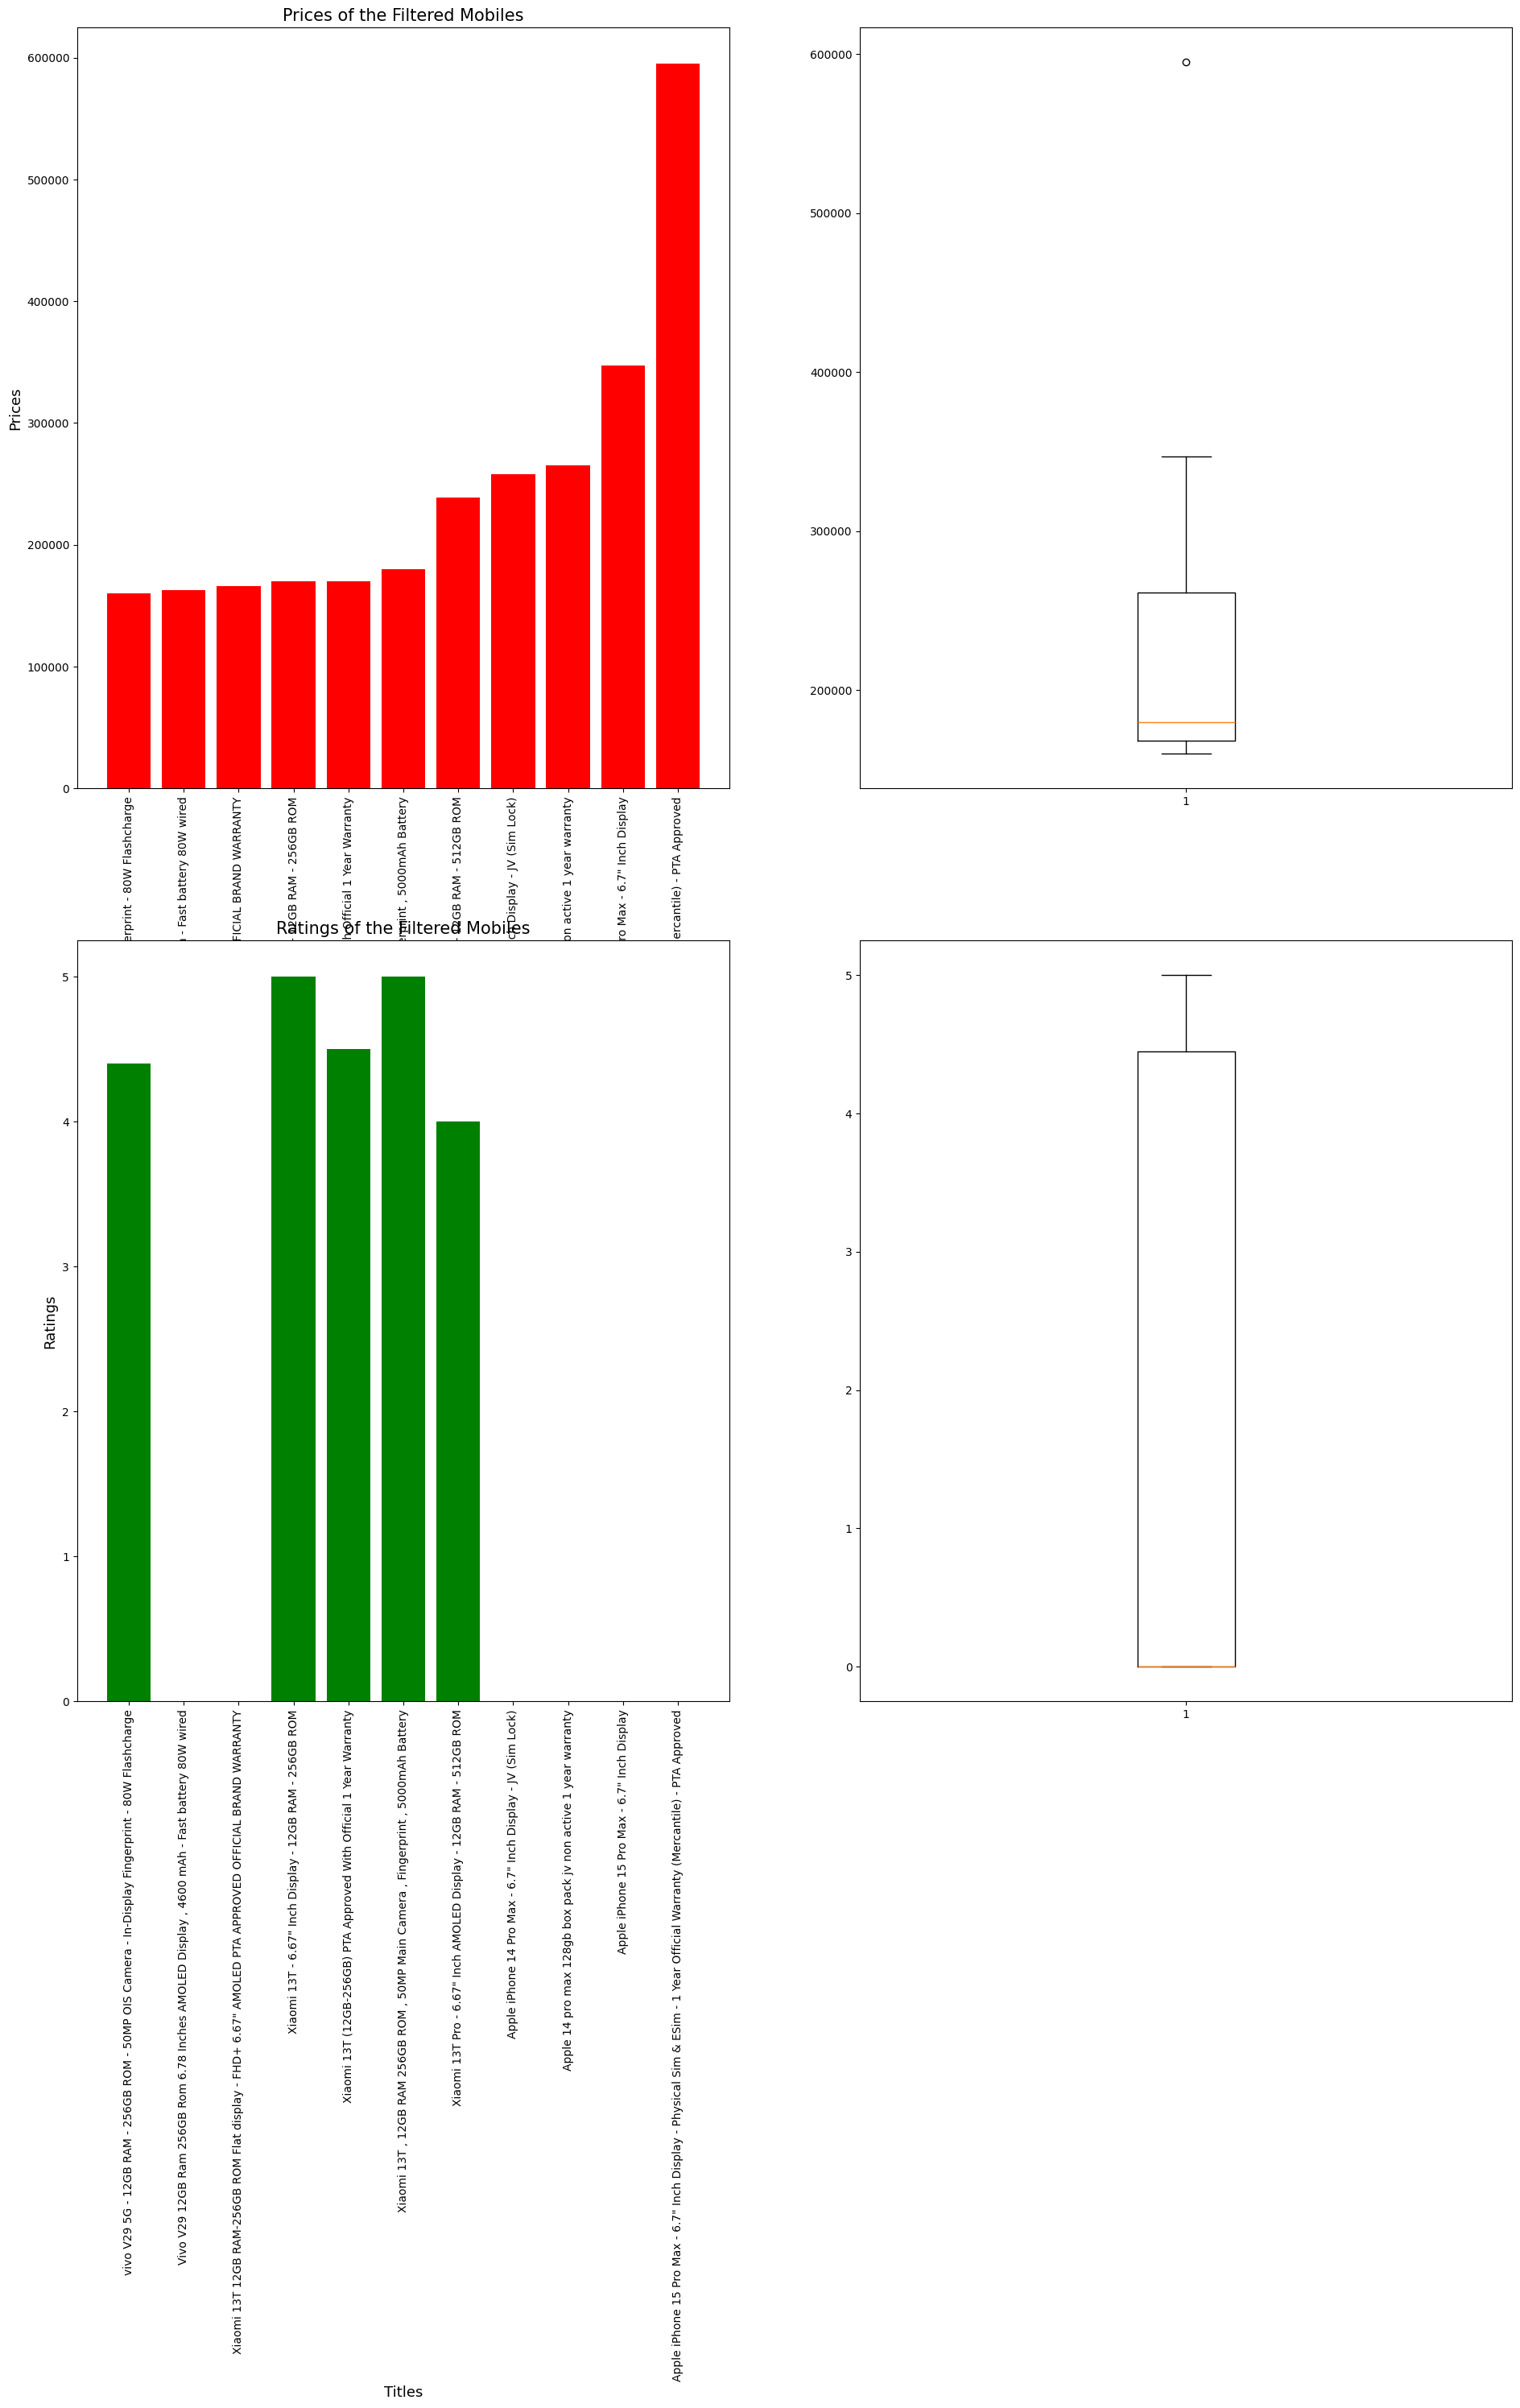

In [294]:
plt.figure(figsize=(23,27))

plt.subplot (2, 2, 1)
plt.bar (result ['Title'], result ['Price'], color = 'r')
plt.title("Prices of the Filtered Mobiles", fontsize=15)
plt.xlabel("Titles",fontsize=13)
plt.ylabel("Prices",fontsize=13)
plt.xticks (result ['Title'], rotation = 90)
plt.show

plt.subplot (2, 2, 2)
plt.boxplot (result ['Price'])
plt.show

plt.subplot (2, 2, 3)
plt.bar (result ['Title'], result ['Rating'], color = 'g')
plt.title("Ratings of the Filtered Mobiles", fontsize=15)
plt.xlabel("Titles",fontsize=13)
plt.ylabel("Ratings",fontsize=13)
plt.xticks (result ['Title'], rotation = 90)
plt.show

plt.subplot (2, 2, 4)
plt.boxplot (result ['Rating'])
plt.show